###### Import the necessary dependencies

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore", category = RuntimeWarning)

In [2]:
input_data = pd.read_csv('../input/travel-review-ratings/google_review_ratings.csv')

In [3]:
input_data.shape

(5456, 26)

In [4]:
input_data.columns

Index(['User', 'Category 1', 'Category 2', 'Category 3', 'Category 4',
       'Category 5', 'Category 6', 'Category 7', 'Category 8', 'Category 9',
       'Category 10', 'Category 11', 'Category 12', 'Category 13',
       'Category 14', 'Category 15', 'Category 16', 'Category 17',
       'Category 18', 'Category 19', 'Category 20', 'Category 21',
       'Category 22', 'Category 23', 'Category 24', 'Unnamed: 25'],
      dtype='object')

In [5]:
input_data.head(5)

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


###### Data Cleaning and Preprocessing

In [6]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
User           5456 non-null object
Category 1     5456 non-null float64
Category 2     5456 non-null float64
Category 3     5456 non-null float64
Category 4     5456 non-null float64
Category 5     5456 non-null float64
Category 6     5456 non-null float64
Category 7     5456 non-null float64
Category 8     5456 non-null float64
Category 9     5456 non-null float64
Category 10    5456 non-null float64
Category 11    5456 non-null object
Category 12    5455 non-null float64
Category 13    5456 non-null float64
Category 14    5456 non-null float64
Category 15    5456 non-null float64
Category 16    5456 non-null float64
Category 17    5456 non-null float64
Category 18    5456 non-null float64
Category 19    5456 non-null float64
Category 20    5456 non-null float64
Category 21    5456 non-null float64
Category 22    5456 non-null float64
Category 23    5456 non-null float64
Categor

There are only 2 non null values in the last column. There are only 24 categories described in the dataset description and the last column is not present there. So let's drop the column

In [7]:
input_data.drop('Unnamed: 25', axis = 1, inplace = True)

Renaming the columns for ease of understanding

In [8]:
column_names = ['user_id', 'churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services', 'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars', 'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens']
input_data.columns = column_names

In [9]:
input_data[column_names].isnull().sum()

user_id                  0
churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs_bars                0
local_services           0
burger_pizza_shops       1
hotels_other_lodgings    0
juice_bars               0
art_galleries            0
dance_clubs              0
swimming_pools           0
gyms                     0
bakeries                 0
beauty_spas              0
cafes                    0
view_points              0
monuments                0
gardens                  1
dtype: int64

There are two columns with one null value each. Let us impute the null values with 0 considering that the user didn't give rating to these categories

In [10]:
input_data = input_data.fillna(0)

In [11]:
input_data.dtypes

user_id                   object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs_bars                float64
local_services            object
burger_pizza_shops       float64
hotels_other_lodgings    float64
juice_bars               float64
art_galleries            float64
dance_clubs              float64
swimming_pools           float64
gyms                     float64
bakeries                 float64
beauty_spas              float64
cafes                    float64
view_points              float64
monuments                float64
gardens                  float64
dtype: object

Converting the column 'local services' to float datatype

There is a string present among the rows. Let's check how many rows have such values and convert them to float

In [12]:
input_data['local_services'][input_data['local_services'] == '2\t2.']

2712    2\t2.
Name: local_services, dtype: object

There is only one row with that value. Let us replace that value with the mean of the rest of the rows

In [13]:
local_services_mean = input_data['local_services'][input_data['local_services'] != '2\t2.']
input_data['local_services'][input_data['local_services'] == '2\t2.'] = np.mean(local_services_mean.astype('float64'))
input_data['local_services'] = input_data['local_services'].astype('float64')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
input_data.dtypes

user_id                   object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs_bars                float64
local_services           float64
burger_pizza_shops       float64
hotels_other_lodgings    float64
juice_bars               float64
art_galleries            float64
dance_clubs              float64
swimming_pools           float64
gyms                     float64
bakeries                 float64
beauty_spas              float64
cafes                    float64
view_points              float64
monuments                float64
gardens                  float64
dtype: object

###### Exploratory Data Analysis

In [15]:
input_data[column_names[:12]].describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,2.550071
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,1.381643
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,0.780000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,1.580000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,2.000000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,3.220000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [16]:
input_data[column_names[12:]].describe()

,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,2.077958,2.125511,2.190861,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560469
std,1.249411,1.406542,1.576686,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171840
min,0.000000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,2.282500,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [17]:
input_data_description = input_data.describe()
min_val = input_data_description.loc['min'] > 0
min_val[min_val]

parks                    True
theatres                 True
museums                  True
malls                    True
zoo                      True
restaurants              True
pubs_bars                True
local_services           True
hotels_other_lodgings    True
juice_bars               True
Name: min, dtype: bool

The above 10 categories have been given a rating by all the users as the minimum value is greater than 0

Text(0.5, 1.0, 'No of reviews under each category')

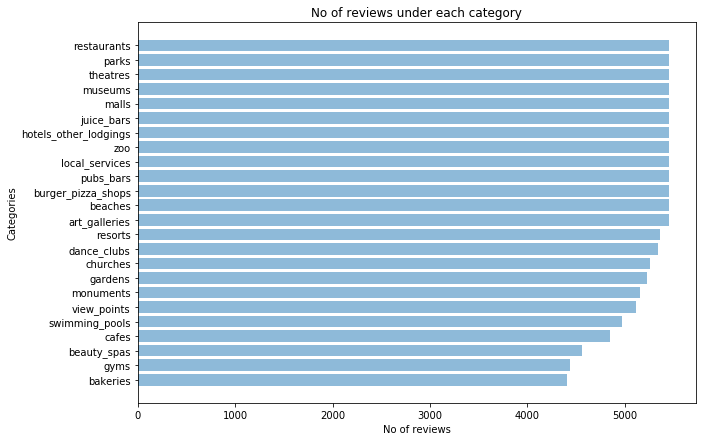

In [18]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcdefaults()
%matplotlib inline
no_of_zeros = input_data[column_names[1:]].astype(bool).sum(axis=0).sort_values()

plt.figure(figsize=(10,7))
plt.barh(np.arange(len(column_names[1:])), no_of_zeros.values, align='center', alpha=0.5)
plt.yticks(np.arange(len(column_names[1:])), no_of_zeros.index)
plt.xlabel('No of reviews')
plt.ylabel('Categories')
plt.title('No of reviews under each category')

Let us look at how many users have given rating for each category

No of users given rating to bakeries and gyms are the least

Let us have a look at the summary of ratings given by users for various categories

In [19]:
no_of_reviews = input_data[column_names[1:]].astype(bool).sum(axis=1).value_counts()

Text(0.5, 1.0, 'No of Categories vs No of reviews')

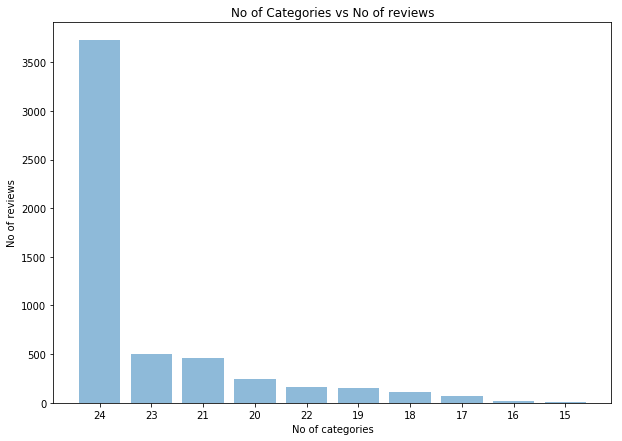

In [20]:
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(no_of_reviews)), no_of_reviews.values, align='center', alpha=0.5)
plt.xticks(np.arange(len(no_of_reviews)), no_of_reviews.index)
plt.ylabel('No of reviews')
plt.xlabel('No of categories')
plt.title('No of Categories vs No of reviews')

Around 3500 users have given a rating for all the 24 categories and the least no of rating given by a user is 15. So for users with lesser number of ratings a recommender system can be built

In [21]:
avg_rating = input_data[column_names[1:]].mean()
avg_rating = avg_rating.sort_values()

Text(0.5, 1.0, 'Average rating per Category')

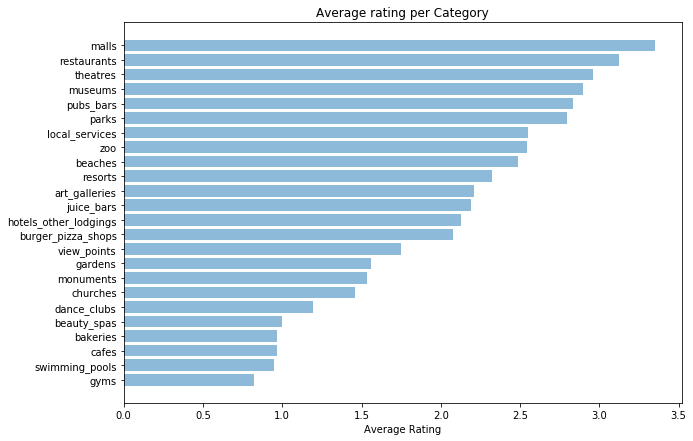

In [22]:
plt.figure(figsize=(10,7))
plt.barh(np.arange(len(column_names[1:])), avg_rating.values, align='center', alpha=0.5)
plt.yticks(np.arange(len(column_names[1:])), avg_rating.index)
plt.xlabel('Average Rating')
plt.title('Average rating per Category')

Malls have the highest average rating and gyms have the lowest average rating implying that travellers prefer malls and least preferres is gym. We can even relate this to the common phenomena that gyms are not usually visited by tourists

Let us basket the different categories into higher levels and do an analysis to see if there is any influence of the type of the tourist attraction

In [23]:
entertainment = ['theatres', 'dance_clubs', 'malls']
food_travel = ['restaurants', 'pubs_bars', 'burger_pizza_shops', 'juice_bars', 'bakeries', 'cafes']
places_of_stay = ['hotels_other_lodgings', 'resorts']
historical = ['churches', 'museums', 'art_galleries', 'monuments']
nature = ['beaches', 'parks', 'zoo', 'view_points', 'gardens']
services = ['local_services', 'swimming_pools', 'gyms', 'beauty_spas']

In [24]:
df_category_reviews = pd.DataFrame(columns = ['entertainment', 'food_travel', 'places_of_stay', 'historical', 'nature', 'services'])

In [25]:
df_category_reviews['entertainment'] = input_data[entertainment].mean(axis = 1)
df_category_reviews['food_travel'] = input_data[food_travel].mean(axis = 1)
df_category_reviews['places_of_stay'] = input_data[places_of_stay].mean(axis = 1)
df_category_reviews['historical'] = input_data[historical].mean(axis = 1)
df_category_reviews['nature'] = input_data[nature].mean(axis = 1)
df_category_reviews['services'] = input_data[services].mean(axis = 1)

In [26]:
df_category_reviews.describe()

,entertainment,food_travel,places_of_stay,historical,nature,services
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,2.501045,2.027203,2.222609,2.021809,2.227604,1.330440
std,0.722411,0.549360,0.886588,0.584988,0.662531,0.580788
min,1.120000,0.721667,0.730000,0.557500,0.576000,0.205000
25%,1.963333,1.650000,1.470000,1.647500,1.762000,0.937500
50%,2.453333,2.027500,1.885000,1.977500,2.160000,1.245000
75%,2.916667,2.433750,3.160000,2.392500,2.656000,1.685000
max,5.000000,3.873333,5.000000,4.322500,4.520000,3.937500


Entertainment has the highest average rating and Services have the lowest rating implying that people are more interested in entertainment

###### Recommender Engines

###### Collaborative Filtering based recommender

###### Recommender based on kNN

In [27]:
from sklearn.neighbors import NearestNeighbors

In [28]:
input_data_matrix = input_data[column_names[1:]].values
knn_model = NearestNeighbors(n_neighbors=5).fit(input_data_matrix)

In [29]:
query_index = np.random.choice(input_data[column_names[1:]].shape[0])
distances, indices = knn_model.kneighbors(input_data[column_names[1:]].iloc[query_index, :].values.reshape(1,-1), n_neighbors = 5)

In [30]:
def compare_df(index, ind):        
    zero_cols_in = input_data.loc[index].astype(bool)
    zero_df_in = pd.DataFrame(zero_cols_in[zero_cols_in == True]).reset_index(level = 0)
    in_wo_rating = zero_df_in['index']
    sug_user = input_data.loc[ind]
    zero_cols_sug = sug_user.astype(bool)
    zero_df_sug = pd.DataFrame(zero_cols_sug[zero_cols_sug == True]).reset_index(level = 0)
    sug_wo_rating = zero_df_sug['index']
    sugg_list = list(set(sug_wo_rating) - set(in_wo_rating))
    return sugg_list
def recommend_knn(index):
    distances, indices = knn_model.kneighbors(input_data[column_names[1:]].iloc[index, :].values.reshape(1,-1), n_neighbors = 10)
    distances = np.sort(distances)
    for i in range(0,len(indices[0])):
        ind = np.where(distances.flatten() == distances[0][i])[0][0]
        sug_list = compare_df(index, indices[0][i]) 
        if len(sug_list) > 0:
            break
    return sug_list
print(recommend_knn(16))                                              

['swimming_pools']
